# BREAST CANCER  

Cancer is a disease in which abnormal cells divide uncontrollably and destroy body tissue. Breast cancer is cancer that forms in the cells of the breasts. Breast cancer is a relatively common type of cancer. Tumors can be benign (noncancerous) or malignant (cancerous). Benign tumors tend to grow slowly and do not spread. Malignant tumors can grow rapidly, invade and destroy nearby normal tissues, and spread throughout the body.


# predicting diagnosis outcomes of breast cancer using machine learning algorithms

we are going to explore the breast cancer data set and classify breast masses of a patient as benign or malignant base on the digital image features.

# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# LOADING DATASET

In [2]:
df = pd.read_csv('data.csv')
df #loading the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# DATA ATTRIBUTE INFORMATION

(1) ID number
(2) Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

(a) radius (mean of distances from center to points on the perimeter)
(b) texture (standard deviation of gray-scale values)
(c) perimeter
(d) area
(e) smoothness (local variation in radius lengths)
(f) compactness (perimeter^2 / area - 1.0)
(g) concavity (severity of concave portions of the contour)
(h) concave points (number of concave portions of the contour)
(i) symmetry
(j) fractal dimension ("coastline approximation" - 1)

# DATA INFORMATION

In [3]:
df.head()  #checking the head 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape #checking the shape of the dataset

(569, 33)

The data set has 569 roes and 33 columns

In [5]:
df.columns #The columns of our data set

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
#checking for null 
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.duplicated().sum() #Checking out for duplicated data on the dataset

0

In [8]:
#Taking down the null column and the id 
df1 = df.drop(columns = ['Unnamed: 32', 'id'], axis = 1)
df1.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [9]:
#taking a look at the info of our dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
#DESCRIBE THE DATASET
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [11]:
#Looking at the diagnosis column unique feature
df1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

There are two unique or binary feature for the diagnosis column. The diagnosis could either be malignant or benign breast cancer

# DATA EXPLORATION

Exploring the target variable {diagnosis}

B    357
M    212
Name: diagnosis, dtype: int64


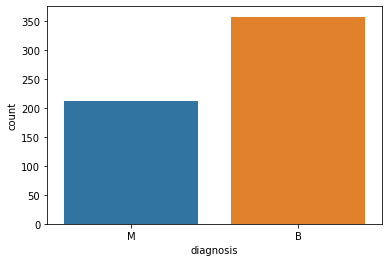

In [12]:
sns.countplot(x = 'diagnosis', data = df1)
print(df1.diagnosis.value_counts())

Patients who are diagnosed of Benign breast cancer have the highest count than the malignant cancer

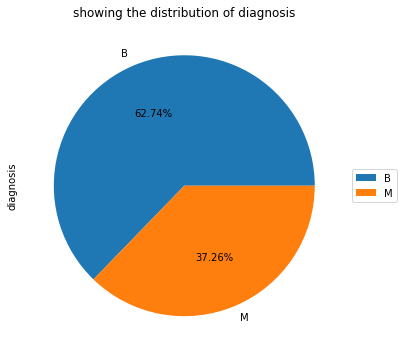

In [13]:
df1['diagnosis'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, figsize = (8,6))
plt.title('showing the distribution of diagnosis')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

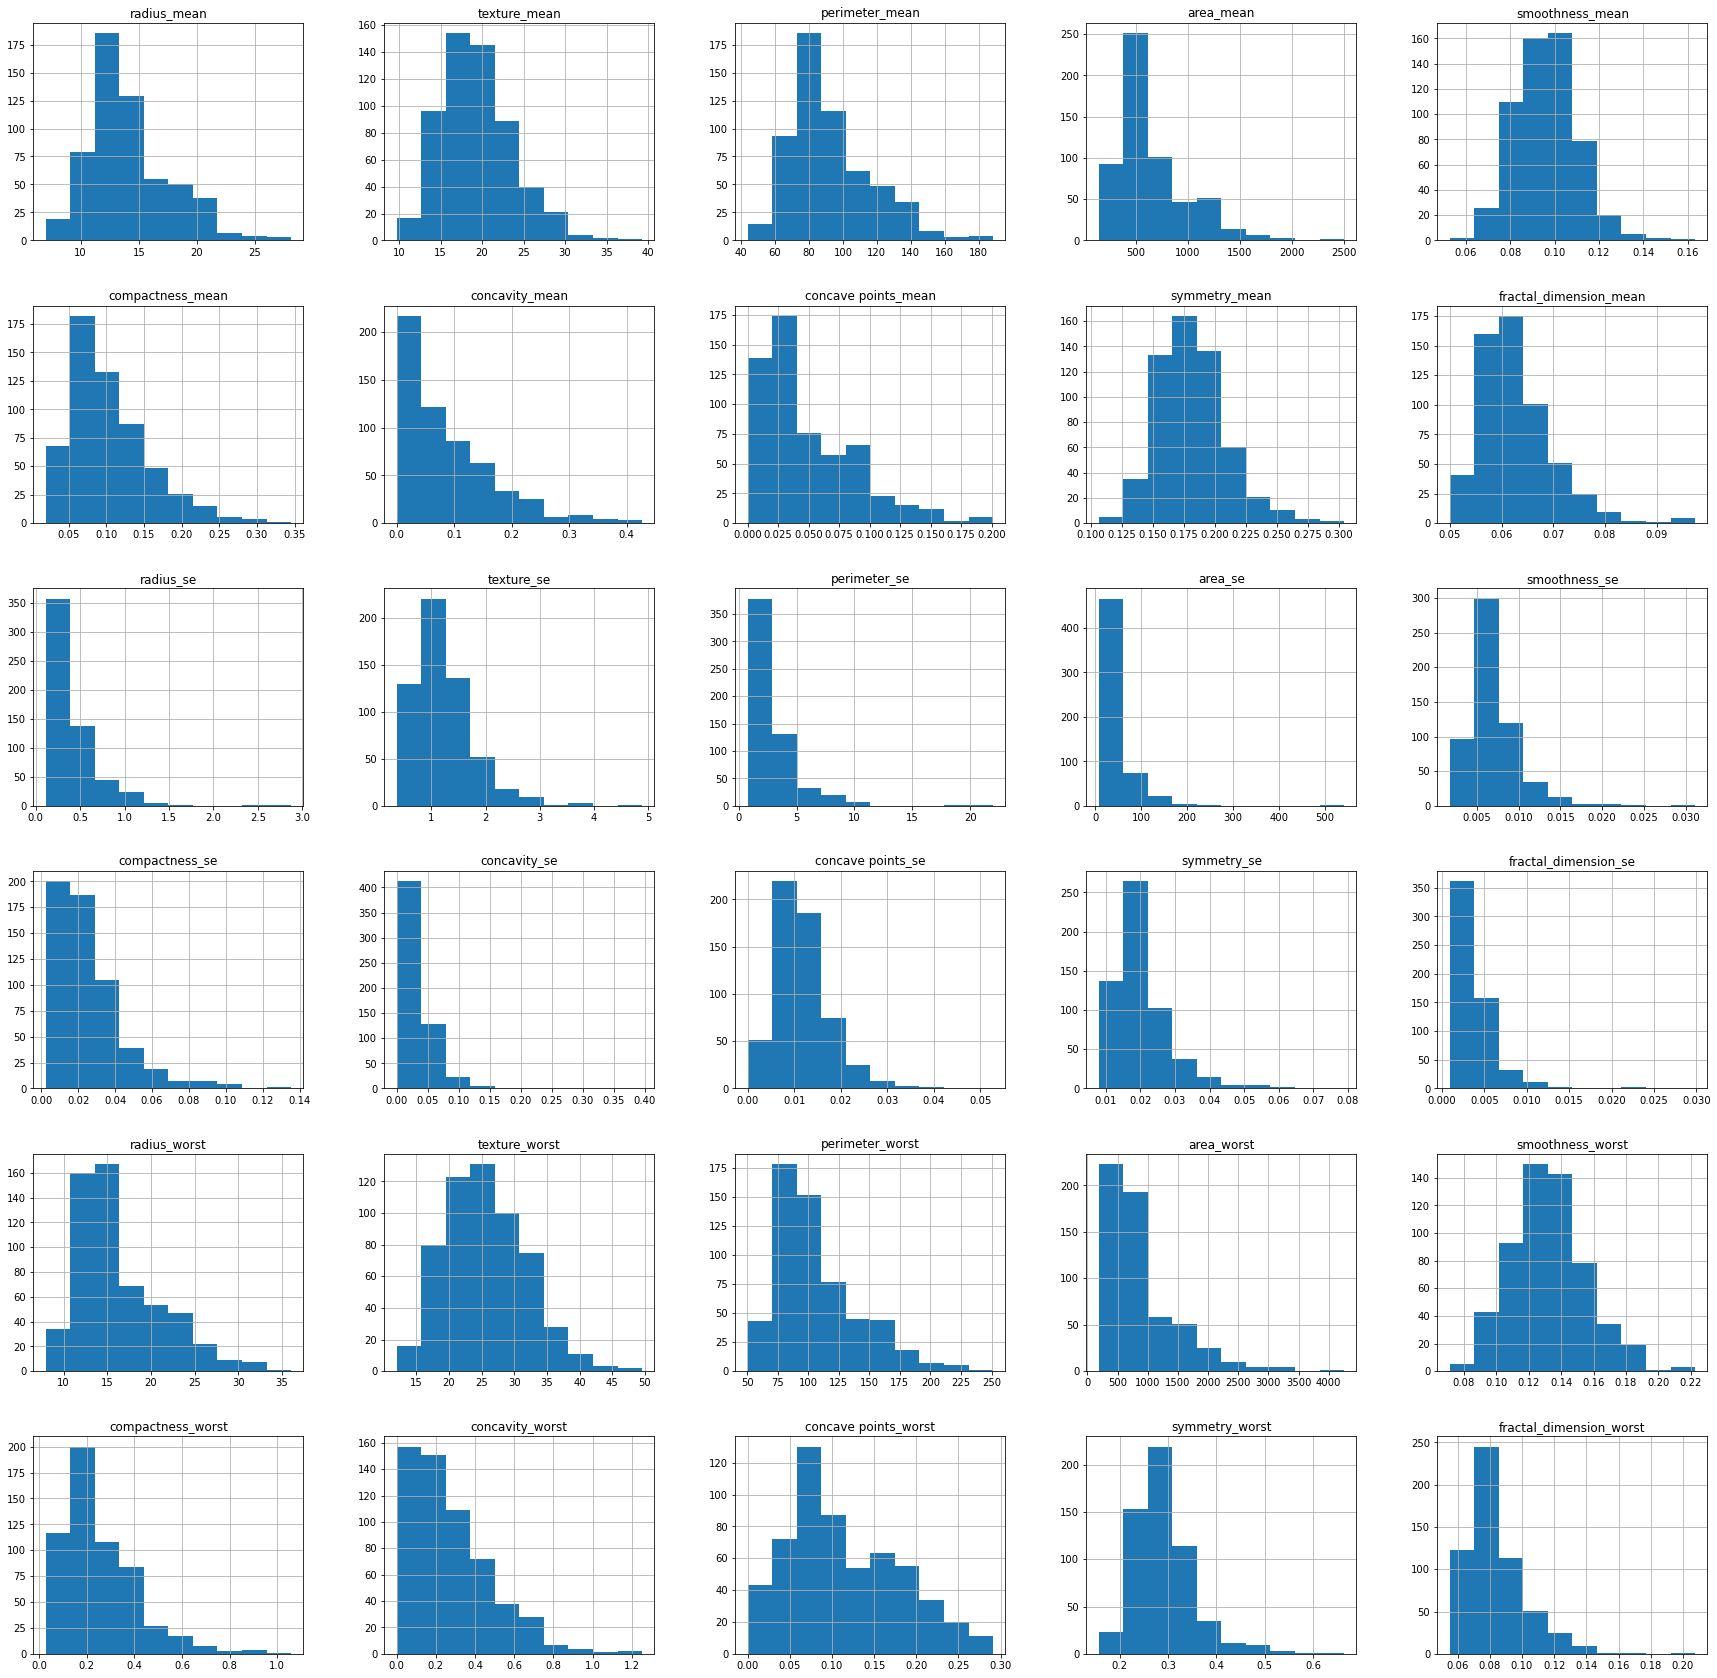

In [14]:
df1.hist(figsize = (30,30))
plt.show()

In [15]:
df1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<AxesSubplot:xlabel='radius_mean'>

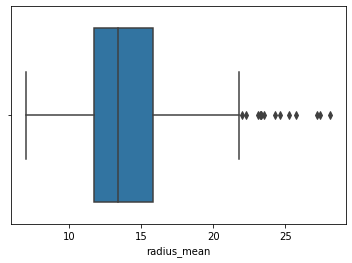

In [16]:
sns.boxplot(x = 'radius_mean', data = df1 )

<AxesSubplot:xlabel='texture_mean'>

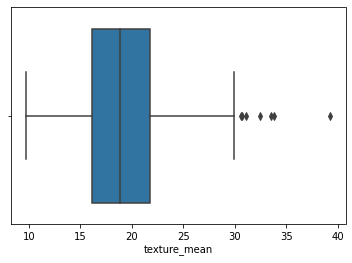

In [17]:
sns.boxplot(x = 'texture_mean', data = df1 )

<AxesSubplot:xlabel='perimeter_mean'>

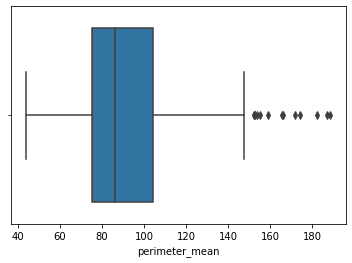

In [18]:
sns.boxplot(x = 'perimeter_mean', data = df1 )

<AxesSubplot:xlabel='area_mean'>

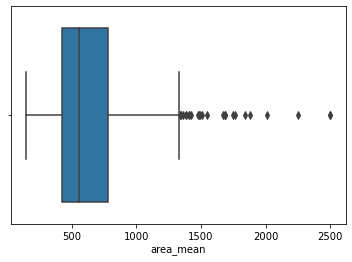

In [19]:
sns.boxplot(x = 'area_mean', data = df1 )

In [20]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


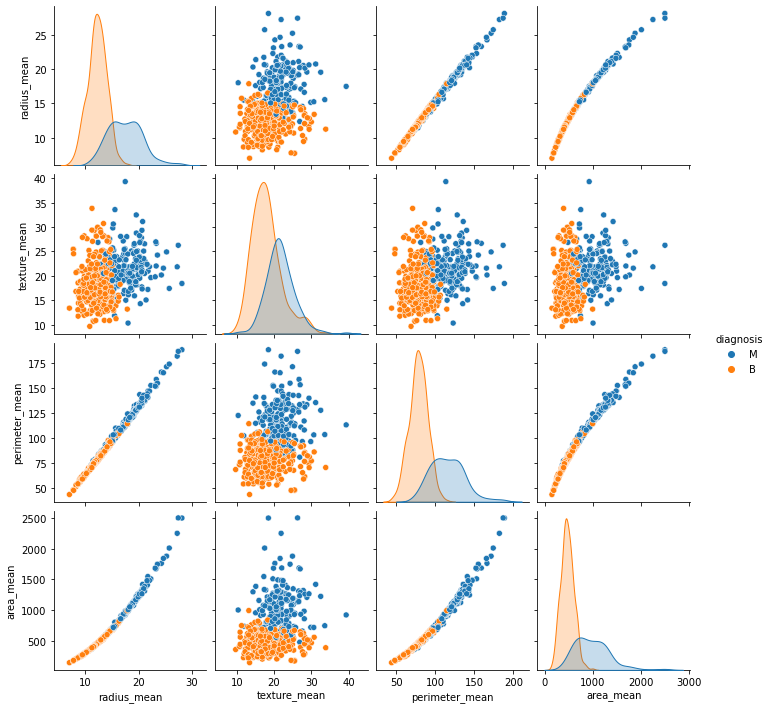

In [21]:
sns.pairplot(df1.iloc[:,0:5], hue = 'diagnosis')

In [22]:
df1.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# DATA PREPROCESSING

In [23]:
#label encoding of the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [24]:
df1['diagnosis'] = label_encoder.fit_transform(df1['diagnosis'])

In [25]:
print(label_encoder.classes_)
diagnosis = {index: label for index, label in enumerate(label_encoder.classes_)}
print(diagnosis)

['B' 'M']
{0: 'B', 1: 'M'}


In [26]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# our target variable has been encoded and we can see the type and unique features again
print(df1['diagnosis'].unique())
print(df1['diagnosis'].dtype)

[1 0]
int32


In [28]:
# getting the target and x
y = df1['diagnosis']
x = df1.drop(columns = ['diagnosis'])
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
# plt.scatter(x = 'radius_mean', y, c = y)

Splitting dataset into training and testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [32]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [33]:
print(x_train.shape)
print(y_train.shape)

(398, 30)
(398,)


In [34]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.910,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.220,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
408,17.990,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
523,13.710,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,15.110,25.63,99.43,701.9,0.14250,0.25660,0.19350,0.12840,0.2849,0.09031
361,13.300,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.200,29.20,92.94,621.2,0.11400,0.16670,0.12120,0.05614,0.2637,0.06658


In [35]:
print(x_test.shape)
print(y_test.shape)

(171, 30)
(171,)


In [36]:
# Scaling features for training
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
x_train


array([[0.21340338, 0.20248963, 0.20869325, ..., 0.25597658, 0.2712399 ,
        0.24111242],
       [0.16607506, 0.36929461, 0.15942229, ..., 0.22487082, 0.12773507,
        0.1533517 ],
       [0.2493729 , 0.34149378, 0.23826964, ..., 0.28284533, 0.30514488,
        0.17237308],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

In [39]:
x_test

array([[0.30380046, 0.44854772, 0.30993021, ..., 0.70651051, 0.39818648,
        0.36639118],
       [0.29480808, 0.64481328, 0.27855711, ..., 0.20685498, 0.17327025,
        0.08421881],
       [0.33314402, 0.24688797, 0.31649506, ..., 0.28301757, 0.11255667,
        0.07910272],
       ...,
       [0.31847224, 0.37219917, 0.31055214, ..., 0.44230107, 0.25310467,
        0.23133937],
       [0.29906763, 0.49211618, 0.28643494, ..., 0.19338615, 0.2113148 ,
        0.07569198],
       [0.1113162 , 0.50746888, 0.10517587, ..., 0.08832243, 0.17149616,
        0.12390135]])

# LOGISTIC REGRESSION

In [40]:
# importing the logistics regression
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(x_train, y_train)

LogisticRegression()

In [43]:
x_pred = model.predict(x_train)
# importing accurracy score
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(y_train, x_pred)
print(x_pred)


[0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


In [44]:
print('The training_data_accuracy: ',  round(training_data_accuracy * 100, 3),'%')

The training_data_accuracy:  96.734 %


In [45]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

# EVALUATIONS

In [46]:
# scoring the logistics regression
model.score(x_test, y_test)

0.9532163742690059

In [47]:
model.predict_proba(x_test)

array([[1.41297867e-01, 8.58702133e-01],
       [8.84260980e-01, 1.15739020e-01],
       [9.62015533e-01, 3.79844668e-02],
       [9.26495065e-01, 7.35049345e-02],
       [9.78242749e-01, 2.17572507e-02],
       [9.42826815e-01, 5.71731849e-02],
       [9.40721461e-01, 5.92785387e-02],
       [9.68744310e-01, 3.12556902e-02],
       [9.94696076e-01, 5.30392386e-03],
       [9.93004067e-01, 6.99593279e-03],
       [6.53355573e-01, 3.46644427e-01],
       [8.26092168e-01, 1.73907832e-01],
       [9.92675115e-01, 7.32488456e-03],
       [6.93803327e-01, 3.06196673e-01],
       [5.92969628e-01, 4.07030372e-01],
       [1.42225392e-01, 8.57774608e-01],
       [9.09861834e-01, 9.01381664e-02],
       [1.25636133e-02, 9.87436387e-01],
       [2.79809291e-02, 9.72019071e-01],
       [1.73822261e-03, 9.98261777e-01],
       [2.10909763e-01, 7.89090237e-01],
       [1.17776043e-01, 8.82223957e-01],
       [8.48767339e-01, 1.51232661e-01],
       [9.64078260e-01, 3.59217396e-02],
       [2.691144

In [48]:
# importing confusion matrix 
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  7  56]]


In [50]:
# Visualizing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

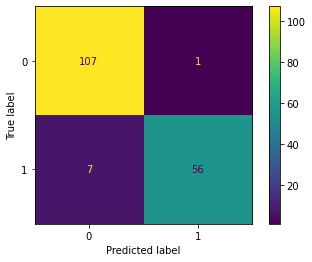

In [51]:
cm_display = ConfusionMatrixDisplay(cm).plot()

 This shows the display of the true label and the predicted {0 = B and 1 = M}

In [52]:
# Getting the precision which is the ratio  of the true positive (TP) to the to the total predicted positive
from sklearn.metrics import precision_score

In [53]:
precision_test = precision_score(y_test,y_pred)
precision_test

0.9824561403508771

In [54]:
# Getting the recall which is the number of true positive to the total actual positive
from sklearn.metrics import recall_score

In [55]:
recall_test = recall_score(y_test,y_pred)
recall_test

0.8888888888888888

In [56]:
# Getting a general report view
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# SUPPORT VECTOR MACHINE (SVM)

In [57]:
from sklearn.svm import SVC

In [58]:
svm_model = SVC()

In [59]:
svm_model.fit(x_train, y_train)

SVC()

In [60]:
svm_model.score(x_test, y_test)

0.9766081871345029

In [61]:
y_pred2 = svm_model.predict(x_test)
y_pred2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [62]:
train_accuracy = accuracy_score(y_test, y_pred2)
print('The train accuracy :' , round(train_accuracy * 100, 3), '%')

The train accuracy : 97.661 %


In [63]:
cm_2 = confusion_matrix(y_test, y_pred2)
print(cm_2)

[[107   1]
 [  3  60]]


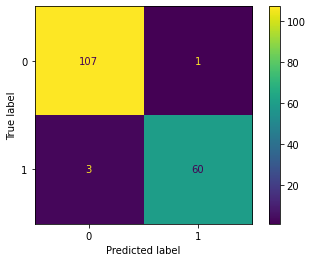

In [64]:
# visualizing the confusion matrix
cm_2_display = ConfusionMatrixDisplay(cm_2).plot()

In [65]:
# Getting the classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# RANDOM FOREST

In [66]:
# importing random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'gini', max_depth = 8, min_samples_split = 10, n_jobs = 1, random_state = 0)

In [67]:
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_jobs=1,
                       random_state=0)

In [70]:
print(classifier.score(x_test, y_test))
print('\n')
y_pred3 = classifier.predict(x_test)
print(y_pred3)

0.9590643274853801


[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [71]:
train_accuracy = accuracy_score(y_test, y_pred3)
print('The train accuracy :' , round(train_accuracy * 100, 3), '%')

The train accuracy : 95.906 %


In [74]:
print(classification_report(y_test,y_pred3))
# classsification report of this model

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# FEATURES SELECTION

In [75]:
features = x.columns
importances = classifier.feature_importances_
sorted_indices = np.argsort(importances)[:: -1]
for i in range(x_train.shape[1]):
    print(i +1,  features[sorted_indices[i]], ':', importances[sorted_indices[i]])


1 perimeter_worst : 0.1542734289423966
2 concave points_worst : 0.14314135823999752
3 concave points_mean : 0.12970690439714092
4 radius_worst : 0.10416513993790502
5 concavity_mean : 0.08802739334803357
6 perimeter_mean : 0.06798317397143992
7 area_worst : 0.04811807477348008
8 area_mean : 0.03900099820729377
9 concavity_worst : 0.03387977837131291
10 area_se : 0.028396459251922204
11 radius_se : 0.02563474716890971
12 radius_mean : 0.021213969107123285
13 compactness_worst : 0.01852299615187373
14 perimeter_se : 0.01657495911912346
15 texture_mean : 0.013053248092254149
16 texture_worst : 0.01299275834645247
17 fractal_dimension_worst : 0.009297034649819173
18 smoothness_worst : 0.008110992929336256
19 symmetry_worst : 0.0070713336978312745
20 compactness_mean : 0.004315150208392781
21 smoothness_mean : 0.004190181442260192
22 symmetry_se : 0.00360535134375577
23 compactness_se : 0.0033455062053026376
24 smoothness_se : 0.003308466836124812
25 fractal_dimension_se : 0.002761353994156

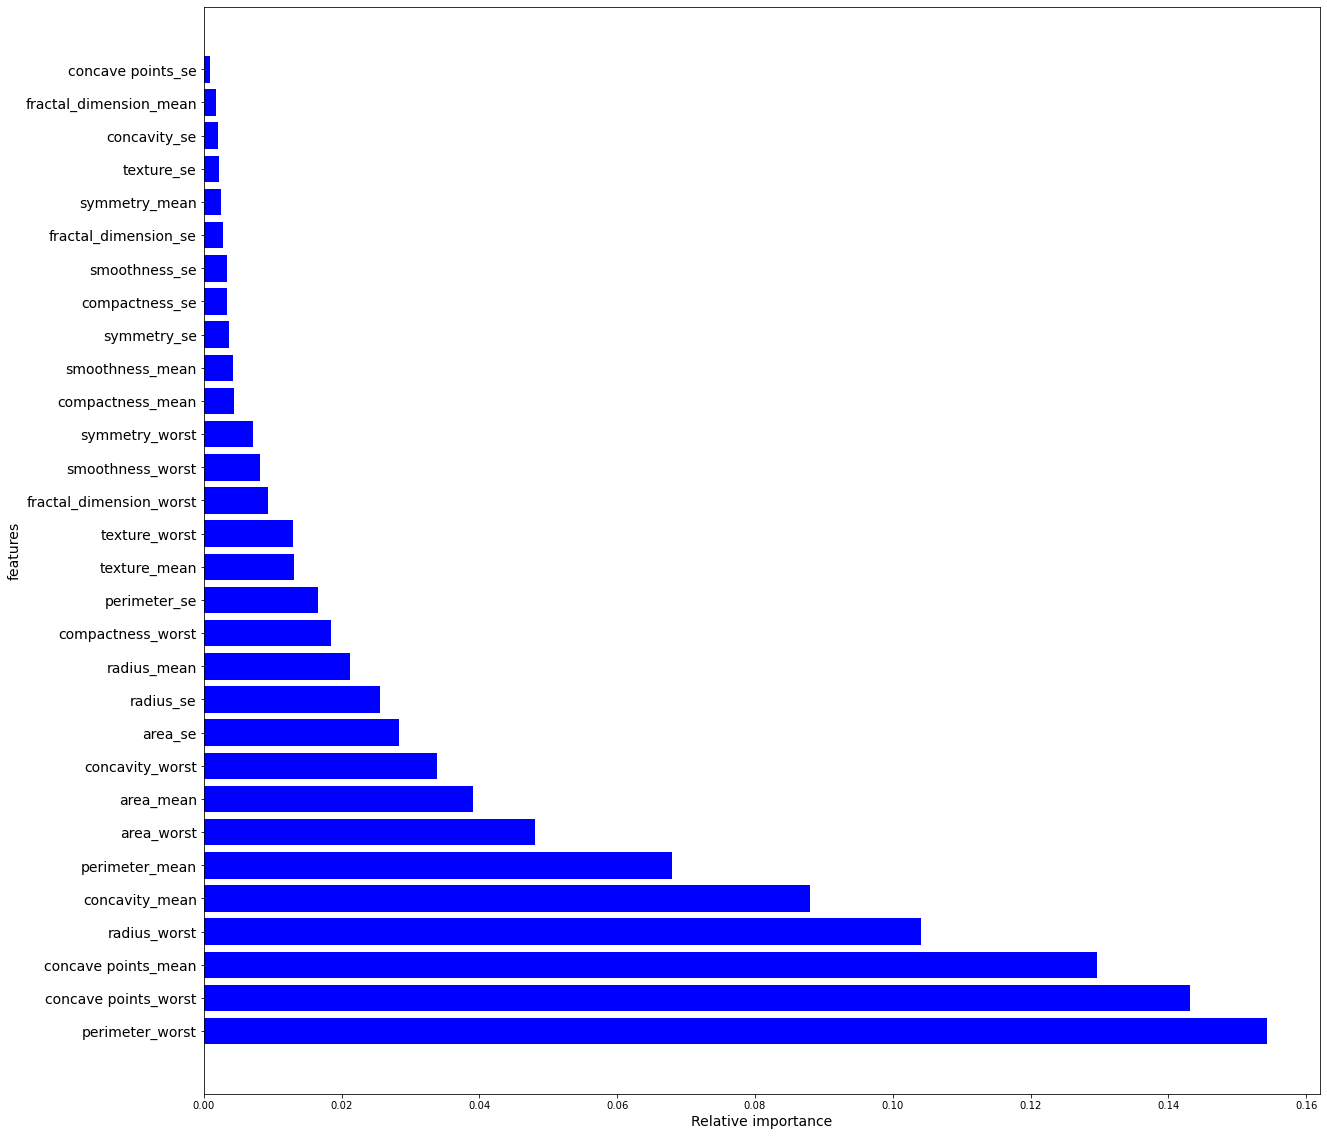

In [76]:
plt.figure(figsize = (20,20))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color = 'b')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices], fontsize = 14)
plt.xlabel('Relative importance', fontsize = 14)
plt.ylabel('features', fontsize = 14)
plt.show()

# CONCLUSION

Three different model was used for this project and therir accuracy and precision was compared. the accuracy of the model was ranked as

SUPPORT VECTOR MACHINE > RANDOM FOREST > LOGISTIC REGRESSION